## **IMPORT REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

sns.set(style='whitegrid')
%matplotlib inline

## **DATASET LOADING AND PREPARATION**

In [2]:
# Load dataset
data = pd.read_excel('earthquakes_dataset_00.xlsx')

# One-hot encoding on categorical variables
df = pd.get_dummies(data, columns=['magType'], drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Features and Target
y = df['alert code']
X = df[['magnitude', 'felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'rms', 'gap', 'depth', 'distanceKM',
        'magType_Ml', 'magType_mb', 'magType_mb_lg', 'magType_ml', 'magType_mw', 'magType_mwb', 'magType_mwr', 'magType_mww']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

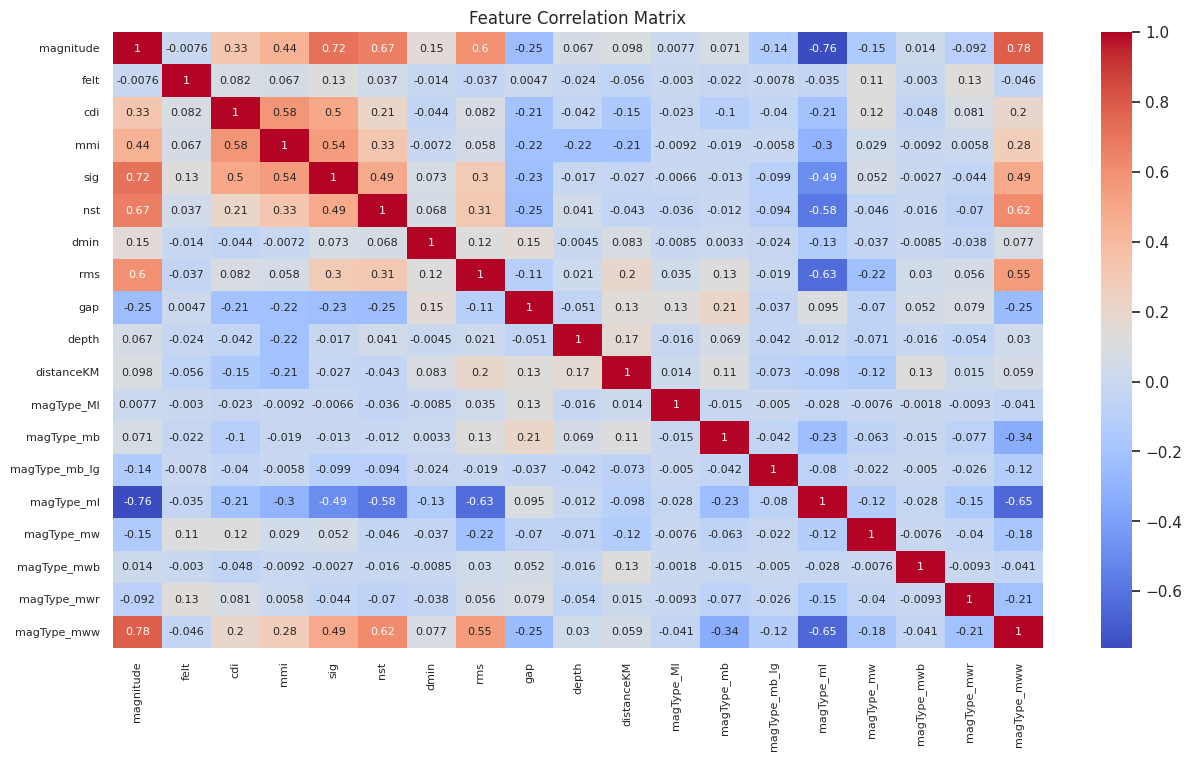

In [3]:
# Correlation Matrix for Multicollinearity
plt.figure(figsize=(15, 8))
plt.xticks(size=8)
plt.yticks(size=8)
sns.heatmap(X.corr(), annot=True, annot_kws={'size': 8}, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

alert code
1    0.671944
0    0.328056
Name: proportion, dtype: float64


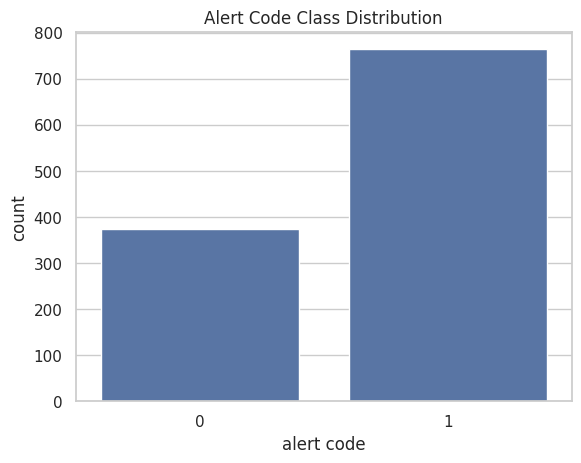

In [4]:
# Dataset Balance check

print(y.value_counts(normalize=True))
sns.countplot(x=y)
plt.title("Alert Code Class Distribution")
plt.show()

## **MODELS TRAINING, PREDICTION AND EVALUATION**

In [5]:
# Function to train, predict and evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    return cm, fpr, tpr, roc_auc

## **MODEL 01: LOGISTIG REGRESSION (LR)**

In [6]:
# Model 1: Logistic Regression
model_1 = LogisticRegression(max_iter=10000, class_weight='balanced')
cm_1, fpr_1, tpr_1, roc_auc_1 = evaluate_model(model_1, X_train, X_test, y_train, y_test, "Logistic Regression (LR)")

# Odds Ratios
odds_ratios = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_1.coef_[0],
    'OddsRatio': np.exp(model_1.coef_[0])
})
print("\nOdds Ratios:\n", odds_ratios.sort_values(by='OddsRatio', ascending=False))


Logistic Regression (LR)
Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        87
           1       0.96      0.97      0.96       141

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228


Odds Ratios:
           Feature  Coefficient  OddsRatio
0       magnitude     4.213739  67.608876
3             mmi     1.643638   5.173960
2             cdi     1.001814   2.723217
18    magType_mww     0.880211   2.411409
4             sig     0.598293   1.819011
8             gap     0.283098   1.327235
10     distanceKM     0.204580   1.227009
1            felt     0.184822   1.203005
17    magType_mwr     0.109249   1.115440
16    magType_mwb     0.090603   1.094835
12     magType_mb    -0.021248   0.978976
9           depth    -0.227711   0.796355
11 

## **MODEL 02: DECISION TREE**


Decision Tree (DT)
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1 Score: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        87
           1       0.98      1.00      0.99       141

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



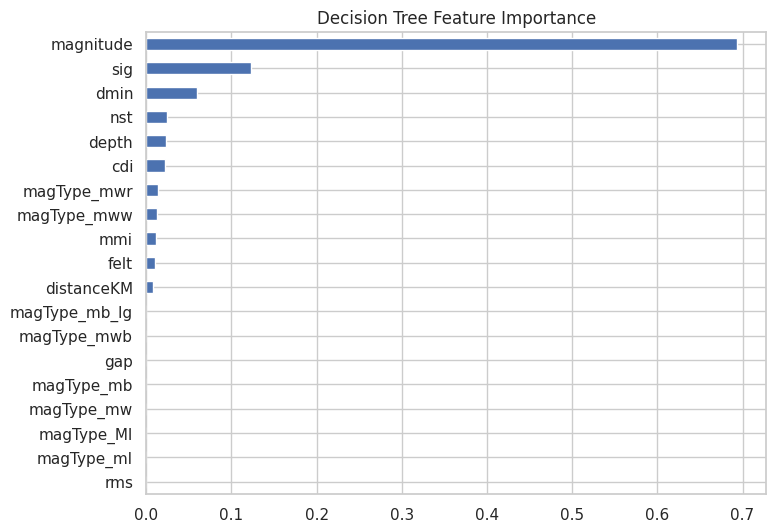

          Feature    Importance    Relative %
0       magnitude  6.932848e-01  6.932848e+01
4             sig  1.227381e-01  1.227381e+01
6            dmin  5.981445e-02  5.981445e+00
5             nst  2.398747e-02  2.398747e+00
9           depth  2.290776e-02  2.290776e+00
2             cdi  2.214914e-02  2.214914e+00
17    magType_mwr  1.415368e-02  1.415368e+00
18    magType_mww  1.219165e-02  1.219165e+00
3             mmi  1.103666e-02  1.103666e+00
1            felt  9.746000e-03  9.746000e-01
10     distanceKM  7.990295e-03  7.990295e-01
13  magType_mb_lg  9.712229e-17  9.712229e-15
8             gap  0.000000e+00  0.000000e+00
7             rms  0.000000e+00  0.000000e+00
11     magType_Ml  0.000000e+00  0.000000e+00
14     magType_ml  0.000000e+00  0.000000e+00
12     magType_mb  0.000000e+00  0.000000e+00
16    magType_mwb  0.000000e+00  0.000000e+00
15     magType_mw  0.000000e+00  0.000000e+00


In [20]:
# Model 2: Decision Tree
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20, class_weight='balanced', random_state=42)
cm_2, fpr_2, tpr_2, roc_auc_2 = evaluate_model(model_2, X_train, X_test, y_train, y_test, "Decision Tree (DT)")

# Feature Importance
importances = model_2.feature_importances_
pd.Series(importances, index=X.columns).sort_values().plot(kind='barh', figsize=(8,6), title='Decision Tree Feature Importance')
plt.show()

# Importance table
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances,
    'Relative %': importances * 100
}).sort_values(by='Importance', ascending=False)

# Show table
print(importance_df)

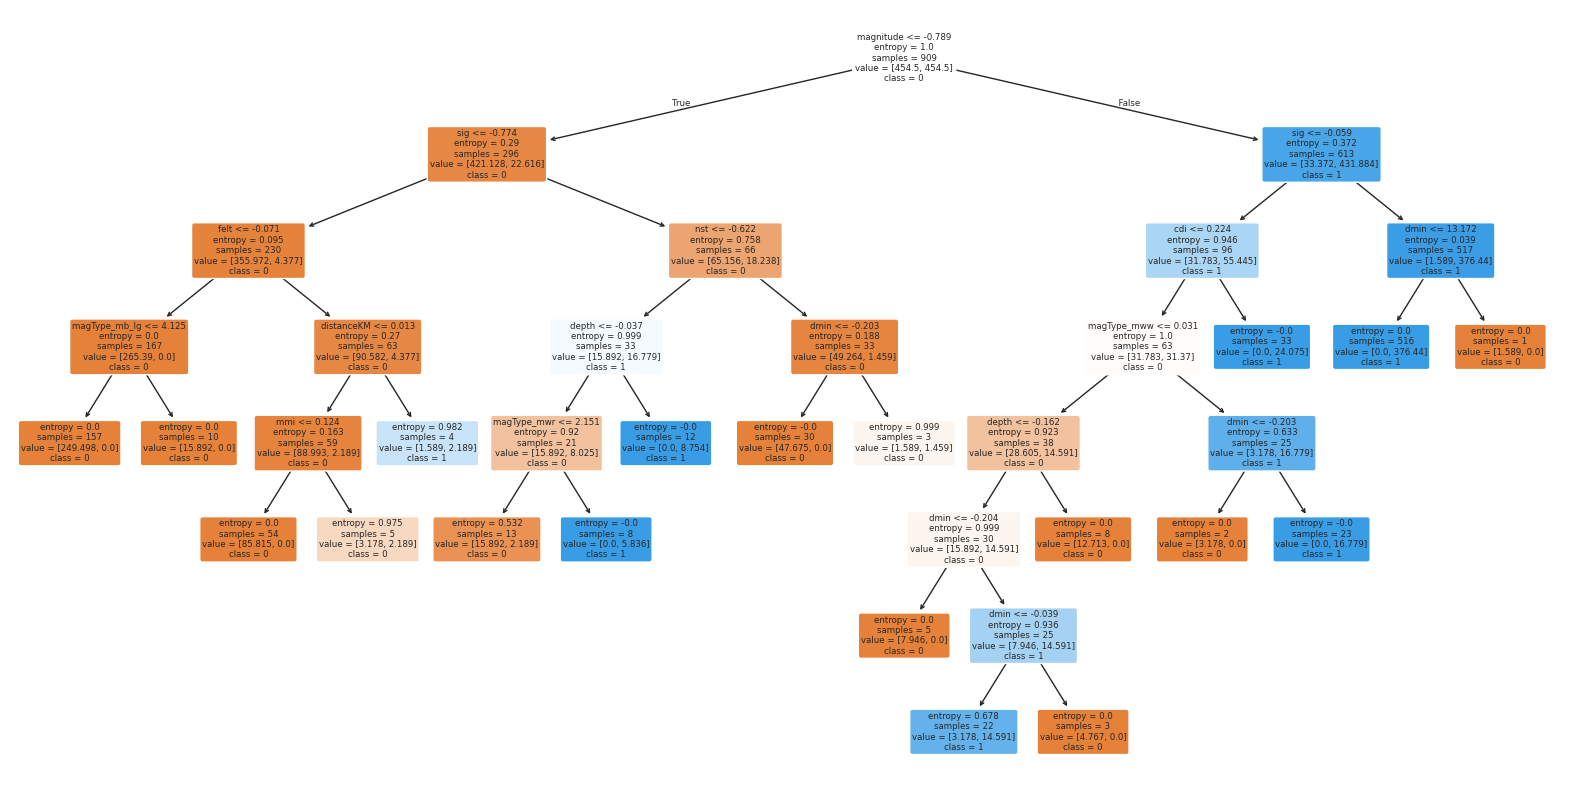

In [8]:
# Decision tree plot

feature_names = X.columns.tolist()
class_names = [str(cls) for cls in sorted(y.unique())]

plt.figure(figsize=(20,10))
plot_tree(model_2, feature_names= feature_names, class_names= class_names, filled=True, rounded=True)
plt.show()

## **MODEL 03: K-NEAREST NEIGHBOR (KNN)**

In [9]:
# Model 3: KNN (Optimal K)
k_values = range(1, 31)
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_scaled, y, cv=5).mean() for k in k_values]
best_k = k_values[np.argmax(scores)]
print(f"\nK-Nearest Neighbor (KNN) for K = {best_k}")
model_3 = KNeighborsClassifier(n_neighbors=best_k)
cm_3, fpr_3, tpr_3, roc_auc_3 = evaluate_model(model_3, X_train, X_test, y_train, y_test, f"KNN (k={best_k})")


K-Nearest Neighbor (KNN) for K = 1

KNN (k=1)
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        87
           1       0.97      0.99      0.98       141

    accuracy                           0.97       228
   macro avg       0.98      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



## **MODEL 04: LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [11]:
# Model 4: LDA
model_4 = LinearDiscriminantAnalysis()
cm_4, fpr_4, tpr_4, roc_auc_4 = evaluate_model(model_4, X_train, X_test, y_train, y_test, "Linear Discriminant Analysis (LDA)")


Linear Discriminant Analysis (LDA)
Accuracy: 0.92
Precision: 0.95
Recall: 0.92
F1 Score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        87
           1       0.95      0.92      0.94       141

    accuracy                           0.92       228
   macro avg       0.91      0.92      0.92       228
weighted avg       0.92      0.92      0.92       228



## **MODEL 05: QUADRATIC DISCRIMINANT ANALYSIS (QDA)**

In [10]:
# Model 5: QDA
model_5 = QuadraticDiscriminantAnalysis()
cm_5, fpr_5, tpr_5, roc_auc_5 = evaluate_model(model_5, X_train, X_test, y_train, y_test, "Quadratic Discriminant Analysis (QDA)")


Quadratic Discriminant Analysis (QDA)
Accuracy: 0.71
Precision: 0.71
Recall: 0.92
F1 Score: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50        87
           1       0.71      0.92      0.80       141

    accuracy                           0.71       228
   macro avg       0.73      0.65      0.65       228
weighted avg       0.72      0.71      0.69       228



/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


## **MODELS COMPARISON**

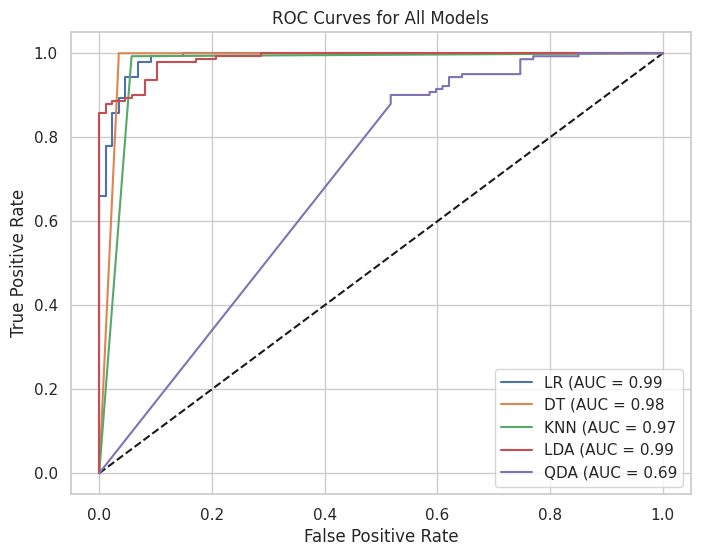

In [12]:
# ROC Curves
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label=f'LR (AUC = {roc_auc_1:.2f}')
plt.plot(fpr_2, tpr_2, label=f'DT (AUC = {roc_auc_2:.2f}')
plt.plot(fpr_3, tpr_3, label=f'KNN (AUC = {roc_auc_3:.2f}')
plt.plot(fpr_4, tpr_4, label=f'LDA (AUC = {roc_auc_4:.2f}')
plt.plot(fpr_5, tpr_5, label=f'QDA (AUC = {roc_auc_5:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

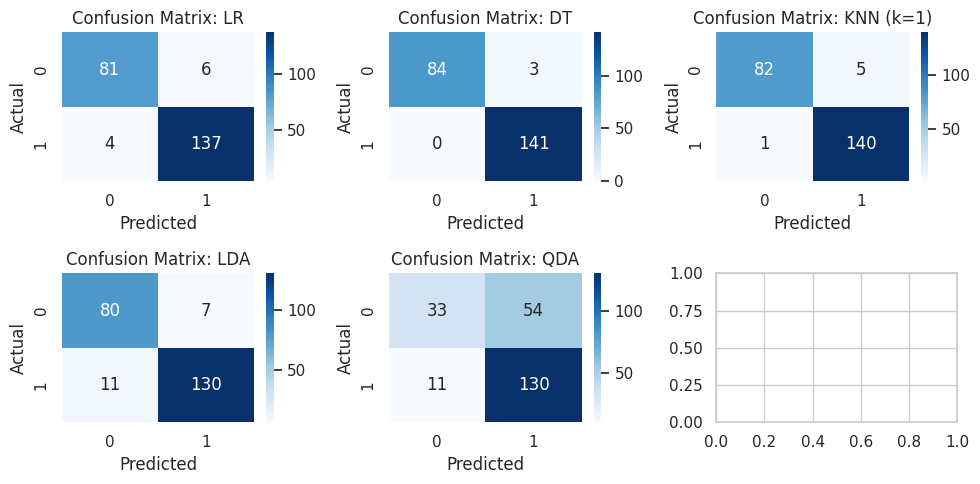

In [ ]:
# Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
cm_list = [cm_1, cm_2, cm_3, cm_4, cm_5]
titles = ['LR', 'DT', f'KNN (k={best_k})', 'LDA', 'QDA']

for i, cm in enumerate(cm_list):
    ax = axes[i//3, i%3]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {titles[i]}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()


# **OVERFITTING TEST**

In [17]:

def evaluate_model_overfitting(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Calculate F1 scores
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print the evaluation report
    print(f"\n Evaluation for {model_name}")
    print(f"Accuracy   - Train: {train_acc:.2f} | Test: {test_acc:.2f} | Gap: {train_acc - test_acc:.2f}")
    print(f"F1 Score   - Train: {train_f1:.2f} | Test: {test_f1:.2f} | Gap: {train_f1 - test_f1:.2f}")

# Apply this function to each model
evaluate_model_overfitting(model_1, X_train, y_train, X_test, y_test, "Logistic Regression")
evaluate_model_overfitting(model_2, X_train, y_train, X_test, y_test, "Decision Tree")
evaluate_model_overfitting(model_3, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")
evaluate_model_overfitting(model_4, X_train, y_train, X_test, y_test, "Linear Discriminant Analysis")
evaluate_model_overfitting(model_5, X_train, y_train, X_test, y_test, "Quadratic Discriminant Analysis")



 Evaluation for Logistic Regression
Accuracy   - Train: 0.96 | Test: 0.96 | Gap: 0.00
F1 Score   - Train: 0.97 | Test: 0.96 | Gap: 0.00

 Evaluation for Decision Tree
Accuracy   - Train: 0.99 | Test: 0.99 | Gap: 0.00
F1 Score   - Train: 0.99 | Test: 0.99 | Gap: 0.00

 Evaluation for K-Nearest Neighbors
Accuracy   - Train: 1.00 | Test: 0.97 | Gap: 0.03
F1 Score   - Train: 1.00 | Test: 0.98 | Gap: 0.02

 Evaluation for Linear Discriminant Analysis
Accuracy   - Train: 0.92 | Test: 0.92 | Gap: 0.00
F1 Score   - Train: 0.94 | Test: 0.94 | Gap: 0.01

 Evaluation for Quadratic Discriminant Analysis
Accuracy   - Train: 0.77 | Test: 0.71 | Gap: 0.05
F1 Score   - Train: 0.85 | Test: 0.80 | Gap: 0.05
